In [6]:
import pandas as pd

customer_feedbacks = pd.read_csv(r"C:\Users\melih\OneDrive\Documents\Open Solar\customer_feedback-sheet.csv")
customer_feedbacks.head()

,Customer ID,Touchpoint,Feedback,Sentiment,Suggested Improvement
0,101,Manage Page,Tasks not visible,Negative,Enable notifications
1,100,Document Management,Unclear organization,Neutral,Document versioning
2,113,Cash Flow,Data is outdated,Positive,Add charts
3,111,Finance,Difficult to track expenses,Positive,Clarify payment steps
4,105,Shop,Layout confusing,Neutral,Improve search


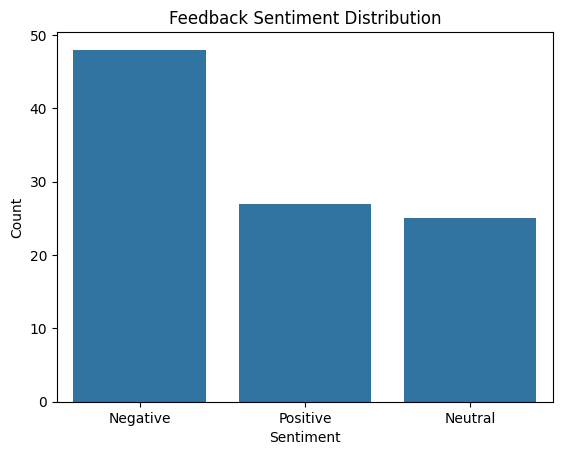

In [7]:
# Sentiment Distribution Analysis
# To get an overall sense of how customers feel—how much feedback is positive, neutral, or negative. This helps measure overall satisfaction.

import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Feedback Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

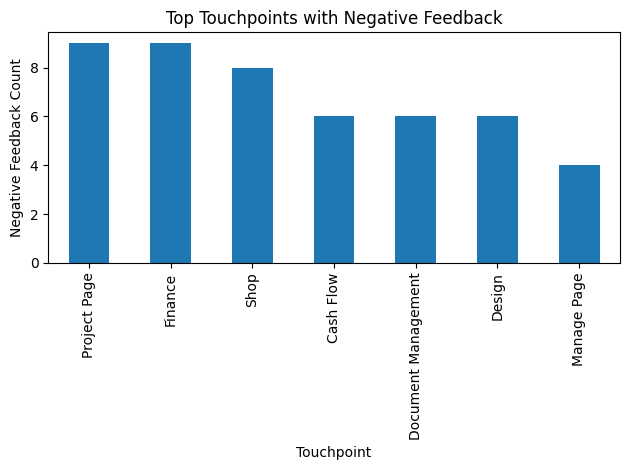

In [8]:
# Count of negative feedbacks by Touchpoint
# To identify which product areas (touchpoints) are causing the most negative experiences. These are your pain points to prioritize fixing.

negative_feedback = df[df['Sentiment'] == 'Negative']
top_negative_touchpoints = negative_feedback['Touchpoint'].value_counts()

top_negative_touchpoints.plot(kind='bar', title="Top Touchpoints with Negative Feedback")
plt.xlabel("Touchpoint")
plt.ylabel("Negative Feedback Count")
plt.tight_layout()
plt.show()


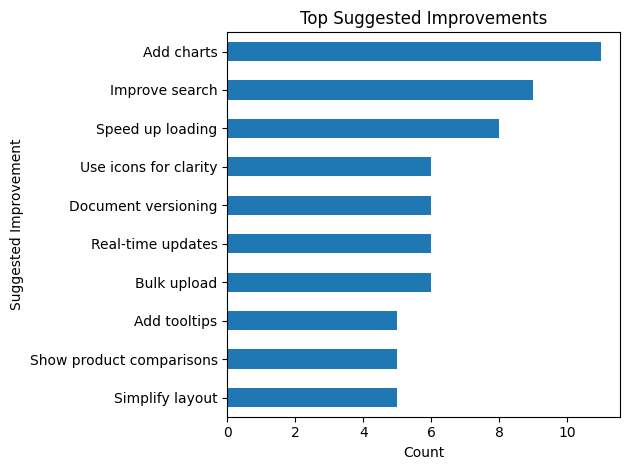

In [9]:
# Frequency of suggested improvements
#To understand what specific features or changes customers are repeatedly asking for. This informs product development priorities.

improvements = df['Suggested Improvement'].value_counts().head(10)

improvements.plot(kind='barh', title="Top Suggested Improvements")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


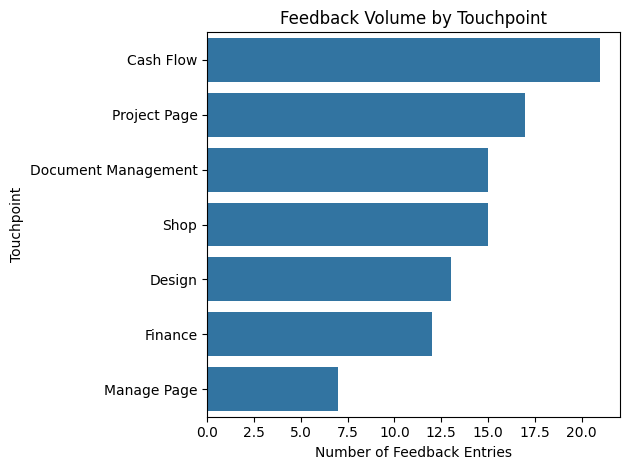

In [10]:
#  Feedback Volume by Touchpoint
# To understand where customers are engaging the most — helps allocate resources and attention appropriately across different product areas.

touchpoint_counts = df['Touchpoint'].value_counts()

sns.barplot(x=touchpoint_counts.values, y=touchpoint_counts.index)
plt.title("Feedback Volume by Touchpoint")
plt.xlabel("Number of Feedback Entries")
plt.ylabel("Touchpoint")
plt.tight_layout()
plt.show()


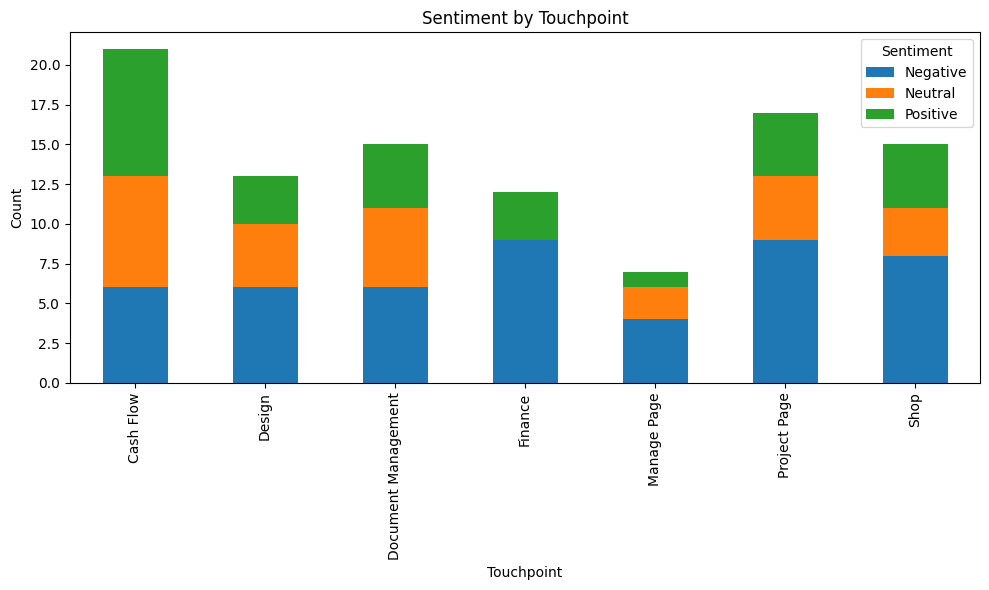

In [11]:
# Cross-tab: Sentiment by Touchpoint
# To compare how each product area is performing sentiment-wise. It gives a detailed view of customer perception by touchpoint.

# Crosstab of Sentiment and Touchpoint
crosstab = pd.crosstab(df['Touchpoint'], df['Sentiment'])
crosstab.plot(kind='bar', stacked=True, title="Sentiment by Touchpoint", figsize=(10,6))
plt.xlabel("Touchpoint")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [12]:
# Recommendations Based on Frequent Suggestions
# To summarize what users consistently ask for per touchpoint turns qualitative feedback into practical product recommendations.

recommendations = df.groupby('Touchpoint')['Suggested Improvement'].agg(pd.Series.mode)
print("Top Recommendations by Touchpoint:\n")
print(recommendations)


Top Recommendations by Touchpoint:

Touchpoint
Cash Flow                                             Add charts
Design                           [Add tooltips, Simplify layout]
Document Management           [Bulk upload, Document versioning]
Finance                                    Use icons for clarity
Manage Page            [Add task tracking, Enable notifications]
Project Page                                    Speed up loading
Shop                                              Improve search
Name: Suggested Improvement, dtype: object


In [13]:
# Sentiment vs Touchpoint
# Reveals which touchpoints have a higher proportion of negative sentiment — signals possible problem areas.

sentiment_touchpoint = pd.crosstab(df['Touchpoint'], df['Sentiment'], normalize='index') * 100
print(sentiment_touchpoint.sort_values('Negative', ascending=False))




Sentiment             Negative    Neutral   Positive
Touchpoint                                          
Finance              75.000000   0.000000  25.000000
Manage Page          57.142857  28.571429  14.285714
Shop                 53.333333  20.000000  26.666667
Project Page         52.941176  23.529412  23.529412
Design               46.153846  30.769231  23.076923
Document Management  40.000000  33.333333  26.666667
Cash Flow            28.571429  33.333333  38.095238


In [15]:
# Touchpoint vs Suggested Improvement
# Shows which improvements are most frequently linked to which parts of the product helps align solutions to pain points.
# Group most common suggestions per touchpoint

common_suggestions = df.groupby('Touchpoint')['Suggested Improvement'].agg(lambda x: x.mode().iloc[0])
print(common_suggestions)


Touchpoint
Cash Flow                         Add charts
Design                          Add tooltips
Document Management              Bulk upload
Finance                Use icons for clarity
Manage Page                Add task tracking
Project Page                Speed up loading
Shop                          Improve search
Name: Suggested Improvement, dtype: object


In [16]:
# Sentiment vs Suggested Improvement Similarity
# Check how often the same suggestions appear across different sentiments
# Finds improvements mentioned across multiple sentiment types indicates suggestions that are broadly relevant or misunderstood features.


suggestion_sentiment_overlap = df.groupby(['Suggested Improvement', 'Sentiment']).size().unstack(fill_value=0)
print(suggestion_sentiment_overlap[suggestion_sentiment_overlap.sum(axis=1) > 1])


Sentiment                 Negative  Neutral  Positive
Suggested Improvement                                
Add charts                       3        3         5
Add cost breakdown               2        0         1
Add task tracking                1        2         0
Add timeline view                1        1         2
Add tooltips                     2        1         2
Bulk upload                      1        3         2
Clarify payment steps            2        0         1
Document versioning              3        2         1
Enable notifications             3        0         0
Forecasting tool                 0        3         1
Highlight recent updates         2        1         2
Improve categorization           2        0         1
Improve search                   4        3         2
Improve visual hierarchy         2        1         0
Real-time updates                3        1         2
Show product comparisons         3        0         2
Simplify layout             

In [17]:
# Duplicate Feedback Patterns
# Find repeated Feedback + Sentiment combinations
# Detects patterns in customer complaints — repeated issues show up here, especially when coupled with sentiment.

# Find repeated Feedback + Sentiment combinations
duplicate_patterns = df.groupby(['Feedback', 'Sentiment']).size().reset_index(name='count')
print(duplicate_patterns[duplicate_patterns['count'] > 1])



                       Feedback Sentiment  count
0             Breakdown unclear  Negative      5
1       Can't find old versions  Negative      2
4         Colors are too bright  Negative      2
5         Colors are too bright   Neutral      4
6              Data is outdated  Negative      4
7              Data is outdated   Neutral      3
8              Data is outdated  Positive      4
9   Difficult to track expenses  Negative      4
11           Hard to find files  Negative      2
13           Hard to understand  Negative      2
14           Hard to understand  Positive      3
15               Hard to upload  Negative      2
18             Layout confusing  Negative      2
19             Layout confusing   Neutral      2
20             Layout confusing  Positive      2
21          Missing tax details  Positive      2
23                    No alerts   Neutral      2
26                No trend line   Neutral      4
28                 Slow to load  Negative      3
30                 S

In [18]:
# Customer ID vs Consistent Complaints
# Check if same customers give multiple feedback on different touchpoints
# Finds customers who report problems across multiple areas may indicate deeper dissatisfaction or high engagement.

repeated_customers = df.groupby('Customer ID')['Touchpoint'].nunique()
print(repeated_customers[repeated_customers > 1])


Customer ID
100    2
101    5
102    4
103    3
104    6
105    5
107    2
108    3
109    2
110    3
111    4
112    4
114    7
115    4
117    5
118    3
119    3
120    6
Name: Touchpoint, dtype: int64


In [ ]:
# Count feedbacks per Touchpoint and Sentiment
# The bubble map is used for prioritization by visually representing the volume and sentiment of customer feedback across different touchpoints.

plt.figure(figsize=(12, 7))

# Define sentiment colors and plot one bubble group per sentiment
colors = {'Positive': 'green', 'Neutral': 'blue', 'Negative': 'red'}

for sentiment in ['Positive', 'Neutral', 'Negative']:
    plt.scatter(
        sentiment_counts['Touchpoint'],
        sentiment_counts[sentiment],
        s=sentiment_counts[sentiment] * 10,  # Bubble size
        alpha=0.6,
        label=sentiment,
        color=colors[sentiment],
        edgecolors='black'
    )

# Add chart elements
plt.title("Touchpoint Feedback Sentiment Bubble Map")
plt.xlabel("Touchpoint")
plt.ylabel("Feedback Count")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()